## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[["Mouse ID","Timepoint"]].value_counts()
duplicate_mice.sort_values(ascending = False).head(15)
# mouse "g989" is the only mouse with duplicate timepoints

Mouse ID  Timepoint
g989      20           2
          10           2
          5            2
          0            2
          15           2
a203      45           1
a411      0            1
a251      15           1
          10           1
          5            1
          0            1
a203      35           1
          40           1
a251      30           1
a203      30           1
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study.loc[mouse_study["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study.loc[mouse_study["Mouse ID"]!="g989",:]
mouse_study_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

Summary statistics generated with groupby and summary statistical methods

In [8]:
# For each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen = mouse_study_cleaned[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen")
mean = regimen.mean()
median = regimen.median()
variance = regimen.var()
std = regimen.std()
sem = regimen.sem()

In [9]:
# Assemble the resulting series into a single summary dataframe.
regimen_stats = pd.merge(mean,median, on = "Drug Regimen")
regimen_stats = regimen_stats.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume (mm3)","Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})
regimen_stats2 = pd.merge(variance,std, on="Drug Regimen")
regimen_stats2 = regimen_stats2.rename(columns={"Tumor Volume (mm3)_x":"Variance","Tumor Volume (mm3)_y":"Standard Deviation"})
regimen_stats = pd.merge(regimen_stats,regimen_stats2, on = "Drug Regimen")
regimen_stats = pd.merge(regimen_stats,sem, on = "Drug Regimen")
regimen_stats = regimen_stats.rename(columns={"Tumor Volume (mm3)":"SEM"})
regimen_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Summary statistics generated using the aggregation method, in one line of code

In [10]:
# For the second table, use the agg method to produce the same summary statistics table by using a single line of code. 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_study_cleaned[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").aggregate(["mean","median","var","std","sem"],axis="columns")



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

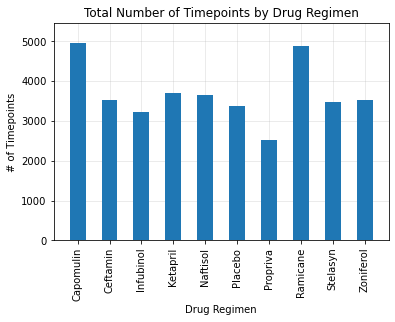

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint = mouse_study_cleaned[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen")
total_timepoints = total_timepoint.sum()
total_timepoints.plot(kind="bar", title = "Total Number of Timepoints by Drug Regimen",
                     ylabel="# of Timepoints", legend=False, sort_columns=True,zorder=10)
plt.grid(alpha=0.3,zorder=0)
plt.xlim(-.75,len(total_timepoint["Drug Regimen"].unique())-.25)
plt.ylim(0,max(total_timepoints.max())+500)
plt.show()

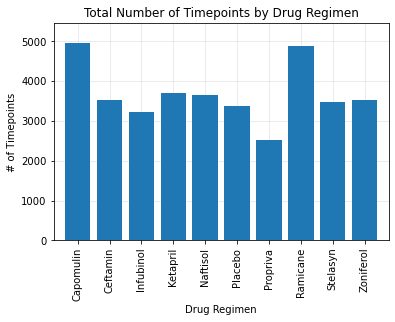

<Figure size 144x216 with 0 Axes>

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
labels = total_timepoints.index
x_axis = np.arange(len(labels))
y_axis = total_timepoints["Timepoint"]

plt.bar(x_axis,y_axis,zorder=10)

plt.title('Total Number of Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')

plt.xticks(x_axis, labels,rotation="vertical")
plt.grid(alpha=0.3,zorder=0)

plt.xlim(-.75,len(x_axis)-.25)
plt.ylim(0,max(total_timepoints.max())+500)

plt.figure(figsize=(2,3))
plt.tight_layout()
plt.show()




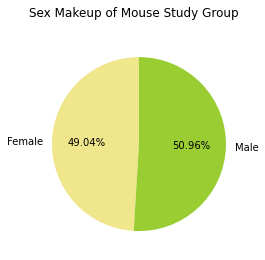

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_study_cleaned[["Sex","Mouse ID"]].groupby("Sex").count()
mouse_sex.plot(kind="pie",subplots=True, startangle=90, autopct='%.2f%%', colors=['khaki','yellowgreen'],
               legend=False, title="Sex Makeup of Mouse Study Group")
plt.ylabel('')
plt.show()

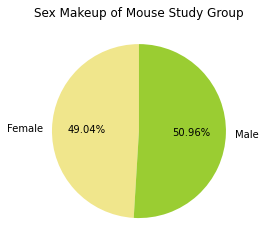

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex.index
count = mouse_sex["Mouse ID"]

plt.pie(count, colors=['khaki','yellowgreen'],labels=labels, autopct="%.2f%%",startangle=90)
plt.title("Sex Makeup of Mouse Study Group")

plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
